# Question 3 (Mexican Hat)

### Import libraries

In [ ]:
import matplotlib.pyplot as plt

### Implement MaxNet to find maximum of mexaican hat

In [ ]:
class MaxNet:
  
  def __init__(self, values, epsilon):
    self.initial_values = values.copy()
    self.old_values = values.copy()
    self.values = values.copy()
    self.epsilon = epsilon
  
  def activate(self, x):
    if x >= 0:
      return x
    return 0
  
  def update(self):
    old_values_sum = sum(self.old_values)
    for index in range(len(self.values)):
      self.values[index] = self.activate(self.old_values[index] - self.epsilon * 
                                         (old_values_sum - self.old_values[index]))
    self.old_values = self.values
  
  def is_stopped(self):
    non_zero_count = sum(element !=0 for element in self.values)
    return non_zero_count == 1
  
  def print_values(self):
    print(*self.values)

  def max_index(self):
    for index in range(len(self.values)):
      if self.values[index] != 0:
        return index
  
  def find_max_index(self, verbose=False):
    if verbose:
      print("Initial values:")
      self.print_values()
    iteration_count = 0

    while not self.is_stopped():
      iteration_count += 1
      self.update()
      if verbose:
        print(f"Iteration {iteration_count} values:")
        self.print_values()
    
    return self.max_index()

## Implement MexicanHat network class

In [ ]:
class MexicanHat:

  def __init__(self, r1, r2, c1, c2, t_max, values, x_max=2):
    self.r1 = r1
    self.r2 = r2
    self.c1 = c1
    self.c2 = c2
    self.t_max = t_max
    self.values = values.copy()
    self.old_values = values.copy()
    self.initial_values = values.copy()
    self.x_max = x_max
    self.iteration_values = [[value] for value in self.values]
    self.iterations_lists = [self.values.copy()]
    self.iterations_max = []

  def max_value(self):
    epsilon = 0.09
    max_net = MaxNet(self.values, epsilon)
    max_index = max_net.find_max_index()
    return self.initial_values[max_index]

  def calculate_friends_opponents_sum(self, index):
    friends_sum = 0
    for offset in range(-self.r1, self.r1+1):
      nei_index = index + offset
      if nei_index < 0 or nei_index >= len(self.values):
        continue
      friends_sum += self.old_values[nei_index]
    
    opponents_sum = 0
    for offset in range(-self.r2, -self.r1):
      nei_index = index + offset
      if nei_index < 0 or nei_index >= len(self.values):
        continue
      opponents_sum += self.old_values[nei_index]
    
    for offset in range(self.r1+1, self.r2+1):
      nei_index = index + offset
      if nei_index < 0 or nei_index >= len(self.values):
        continue
      opponents_sum += self.old_values[nei_index]

    return friends_sum, opponents_sum

  def activate(self, value):
    if value < 0:
      return 0
    if value > self.x_max:
      return self.x_max
    return value

  def update_one_step(self):
    for index in range(len(self.values)):
      friends_sum, opponents_sum = self.calculate_friends_opponents_sum(index)
      self.values[index] = self.c1 * friends_sum + self.c2 * opponents_sum
      self.values[index] = self.activate(self.values[index])
      self.iteration_values[index].append(self.values[index])
    self.old_values = self.values.copy()
  
  def update(self):
    self.iterations_max.append(self.max_value())
    iteration = 1
    print(*self.values)
    while iteration < self.t_max:
      self.update_one_step()
      print(f"Iteration: {iteration}")
      print(*self.values)
      self.iterations_lists.append(self.values.copy())
      self.iterations_max.append(self.max_value())
      iteration += 1
  
  def plot_values_in_iterations(self):
    iterations = [i for i in range(self.t_max)]
    for index, values in enumerate(self.iteration_values):
      plt.plot(iterations, values, label=index)
    plt.xlabel('Iteration number')
    plt.ylabel('Each element value')
    plt.legend(title='Value index')
    plt.show()

  def plot_lists_in_iterations(self):
    indices = [i for i in range(len(self.values))]
    for index, values in enumerate(self.iterations_lists):
      plt.plot(indices, values, label=index)
    plt.xlabel('Value index')
    plt.ylabel('Each element value')
    plt.legend(title='Iteration number')
    plt.show()
  
  def plot_max_value_in_iterations(self):
    iterations = [i for i in range(self.t_max)]
    plt.plot(iterations, self.iterations_max)
    plt.xlabel('Iteration number')
    plt.ylabel('Max value')
    plt.show()

## Test network for given list (R1=0, R2= inf)

0.32 0.33 0.28 0.47 0.66 0.8 0.4 0.33 0.1 0.26
Iteration: 1
0.02100000000000002 0.033999999999999975 0 0.21599999999999986 0.463 0.6449999999999999 0.12499999999999989 0.033999999999999975 0 0
Iteration: 2
0 0 0 0.12699999999999984 0.44810000000000005 0.6846999999999999 0.008699999999999875 0 0 0
Iteration: 3
0 0 0 0.038249999999999784 0.45568000000000014 0.7632599999999998 0 0 0 0
Iteration: 4
0 0 0 0 0.4666650000000002 0.8665189999999997 0 0 0 0
Iteration: 5
0 0 0 0 0.4733461000000002 0.9931562999999995 0 0 0 0
Iteration: 6
0 0 0 0 0.4686996900000002 1.1444529499999994 0 0 0 0
Iteration: 7
0 0 0 0 0.4479943330000003 1.326473570999999 0 0 0 0
Iteration: 8
0 0 0 0 0.4049458425000004 1.5469688518999987 0 0 0 0
Iteration: 9
0 0 0 0 0.33123812581000056 1.8158680380299983 0 0 0 0
Max value is: 0.8


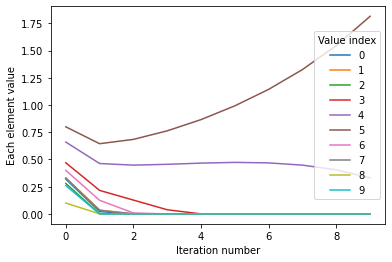

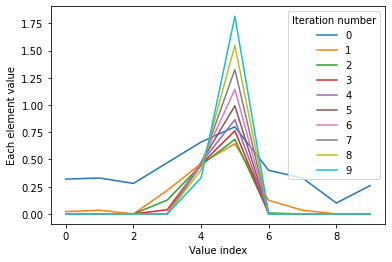

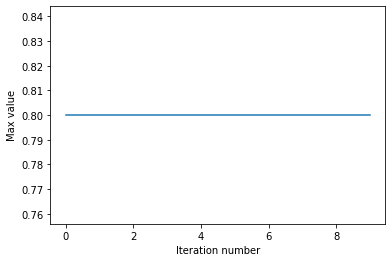

In [ ]:
x = [0.32, 0.33, 0.28, 0.47, 0.66, 0.8, 0.4, 0.33, 0.1, 0.26]
r1 = 0
r2 = len(x)
c1 = 1.2
c2 = -0.1
t_max = 10

mexican_hat = MexicanHat(r1, r2, c1, c2, t_max, x)
mexican_hat.update()

print(f"Max value is: {mexican_hat.max_value()}")

mexican_hat.plot_values_in_iterations()
mexican_hat.plot_lists_in_iterations()
mexican_hat.plot_max_value_in_iterations()

## Test network for given list (R1=1, R2= 5)

0.32 0.33 0.28 0.47 0.66 0.8 0.4 0.33 0.1 0.26
Iteration: 1
0 0 0 0 0.34999999999999964 0.2799999999999999 0.07799999999999985 0 0 0
Iteration: 2
0 0 0 0.06679999999999986 0.3467999999999998 0.4247999999999996 0.07479999999999998 0 0 0
Iteration: 3
0 0 0 0.04831999999999992 0.4731199999999995 0.48111999999999966 0.13431999999999988 0 0 0
Iteration: 4
0 0 0 0.0666879999999998 0.5478079999999994 0.6338079999999993 0.16068799999999991 0 0 0
Iteration: 5
0 0 0 0.05089919999999987 0.6847071999999991 0.7787071999999993 0.23089919999999978 0 0 0
Iteration: 6
0 0 0 0.03752127999999966 0.8162284799999989 0.9962284799999989 0.31152127999999996 0 0 0
Iteration: 7
0 0 0 0 0.9853784319999983 1.2593784319999988 0.4431499519999998 0 0 0
Iteration: 8
0 0 0 0 1.1695941375999983 1.612744089599998 0.6273656575999996 0 0 0
Iteration: 9
0 0 0 0 1.418456673279998 2 0.8762281932799991 0 0 0
Max value is: 0.8


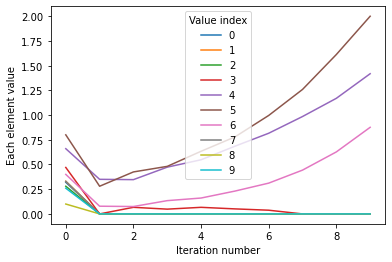

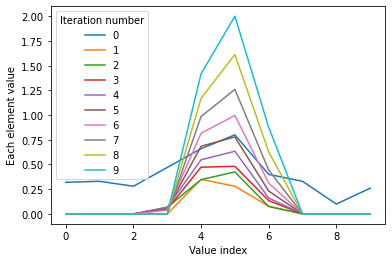

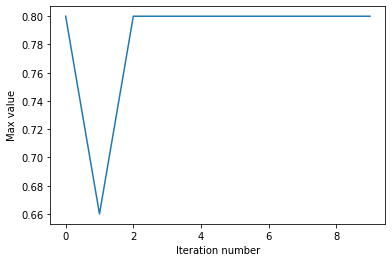

In [ ]:
x = [0.32, 0.33, 0.28, 0.47, 0.66, 0.8, 0.4, 0.33, 0.1, 0.26]
r1 = 1
r2 = 5
c1 = 0.6
c2 = -0.4
t_max = 10

mexican_hat2 = MexicanHat(r1, r2, c1, c2, t_max, x)
mexican_hat2.update()

print(f"Max value is: {mexican_hat.max_value()}")

mexican_hat2.plot_values_in_iterations()
mexican_hat2.plot_lists_in_iterations()
mexican_hat2.plot_max_value_in_iterations()